In [1]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from pandas.io.json import json_normalize
plt.style.use('ggplot')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  
plt.rc('figure', figsize=(10, 10))  
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False 
%matplotlib inline
conn = MongoClient(host='127.0.0.1', port=27017)  
db = conn.get_database('Lianjia')  

zufang = db.get_collection('zufang') 
mon_data = zufang.find() 

In [2]:
data = json_normalize([comment for comment in mon_data])

ServerSelectionTimeoutError: 127.0.0.1:27017: [WinError 10061] 由于目标计算机积极拒绝，无法连接。

In [3]:
data.head()

,_id,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
0,5ce6289f202fc71a3d50dbc8,1,1,岑村,广州,天河,None,东南,1,独栋公寓 月租,独栋·尚观佳园 沐陂店 ❤沐陂总站，10分钟接驳黄村地铁，20分钟直达车陂南 1室1厅,23.159301,1室1厅1卫,113.404226,https://m.lianjia.com/chuzu/gz/apartment/layou...,40,628,元/月,,整租
1,5ce628a1202fc71a3d50dbca,1,1,岑村,广州,天河,None,东,1,独栋公寓 月租 押一付一,独栋·悦橄榄公寓 卓越店 A103 1室1厅,23.170428,1室1厅1卫,113.387968,https://m.lianjia.com/chuzu/gz/apartment/layou...,35,500,元/月,,整租
2,5ce628a3202fc71a3d50dbcc,1,1,岑村,广州,天河,None,东南,1,独栋公寓 押一付一,独栋·悦橄榄公寓 茂军店 B5 1室1厅,23.169549,1室1厅1卫,113.384467,https://m.lianjia.com/chuzu/gz/apartment/layou...,35-38,650-800,元/月,,整租
3,5ce628a4202fc71a3d50dbcf,1,2,岑村,广州,天河,None,东南,1,独栋公寓 新上,独栋·悦橄榄公寓 昱林店 F906 2室1厅,23.170501,2室1厅1卫,113.384511,https://m.lianjia.com/chuzu/gz/apartment/layou...,60,1680,元/月,,整租
4,5ce628a6202fc71a3d50dbd1,1,1,岑村,广州,天河,None,南,1,独栋公寓 押一付一,独栋·悦橄榄公寓 林欣店 B1-3户型 1室1厅,23.168541,1室1厅1卫,113.386056,https://m.lianjia.com/chuzu/gz/apartment/layou...,30,650,元/月,,整租


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89141 entries, 0 to 89140
Data columns (total 20 columns):
_id                   89141 non-null object
bathroom_num          89141 non-null object
bedroom_num           89141 non-null object
bizcircle_name        89141 non-null object
city                  89141 non-null object
dist                  89141 non-null object
distance              37678 non-null object
frame_orientation     89141 non-null object
hall_num              89141 non-null object
house_tag             67784 non-null object
house_title           89141 non-null object
latitude              89097 non-null object
layout                89141 non-null object
longitude             89097 non-null object
m_url                 89141 non-null object
rent_area             89141 non-null object
rent_price_listing    89141 non-null object
rent_price_unit       89141 non-null object
resblock_name         89141 non-null object
type                  89141 non-null object
dtypes: obj

In [9]:
data_sample = pd.concat([data[data['city']==city].sample(6000) for city in ['广州', '深圳']])
data_sample.to_csv('data_sample.csv', index=False)

In [10]:
def get_aver(data):
    if isinstance(data, str) and '-' in data:
        low, high = data.split('-')
        return (int(low)+int(high))/2
    else:
        return int(data)


data['rent_area'] = data['rent_area'].apply(get_aver)

In [11]:
data['rent_price_listing'] = data['rent_price_listing'].apply(get_aver)

In [12]:
for col in ['bathroom_num', 'bedroom_num', 'hall_num', 'rent_price_listing']:
    data[col] = data[col].astype(int)

In [13]:
def dw_None_dis(data):
    if data is None:
        return np.nan
    else:
        return int(data)
    

def dw_None_latlon(data):
    if data is None or data == '':
        return np.nan
    else:
        return float(data)            


data['distance'] = data['distance'].apply(dw_None_dis)
data['latitude'] = data['latitude'].apply(dw_None_latlon)
data['longitude'] = data['longitude'].apply(dw_None_latlon)

In [14]:
data.sample(5)

,_id,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
48071,5ce6907c202fc71a3d528273,2,4,观澜,深圳,光明区,NaN,西南,2,None,华盛观荟 4室2厅 西南,22.717521,4室2厅2卫,114.047962,https://m.lianjia.com/chuzu/sz/zufang/SZ224201...,59.0,3800,元/月,华盛观荟,整租
28558,5ce661f0202fc71a3d51cab7,0,1,金沙洲,佛山,南海,NaN,东南,0,随时看房,万科四季花城商铺 1室0厅 东南,23.157418,1室0厅0卫,113.194620,https://m.lianjia.com/chuzu/fs/zufang/FS224715...,45.0,4000,元/月,万科四季花城商铺,整租
40013,5ce6827b202fc71a3d5241ed,1,1,华强北,深圳,福田区,314.0,南,0,公寓 月租 近地铁 精装 押一付一 新上,整租·阁林网苑 1室0厅 南,22.552955,1室0厅1卫,114.099879,https://m.lianjia.com/chuzu/sz/zufang/SZ226127...,33.0,4500,元/月,阁林网苑,整租
22609,5ce65684202fc71a3d519ad2,2,3,桥南,广州,番禺,NaN,南,2,None,万科金色城品 3室2厅 南,22.918489,3室2厅2卫,113.363660,https://m.lianjia.com/chuzu/gz/zufang/GZ221955...,70.0,4000,元/月,万科金色城品,整租
10374,5ce63be8202fc71a3d512ee1,2,4,珠江新城西,广州,越秀,243.0,北,2,近地铁,名门大厦 4室2厅 北,23.125039,4室2厅2卫,113.322490,https://m.lianjia.com/chuzu/gz/zufang/GZ224978...,143.0,12000,元/月,名门大厦,整租


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89141 entries, 0 to 89140
Data columns (total 20 columns):
_id                   89141 non-null object
bathroom_num          89141 non-null int32
bedroom_num           89141 non-null int32
bizcircle_name        89141 non-null object
city                  89141 non-null object
dist                  89141 non-null object
distance              37678 non-null float64
frame_orientation     89141 non-null object
hall_num              89141 non-null int32
house_tag             67784 non-null object
house_title           89141 non-null object
latitude              89089 non-null float64
layout                89141 non-null object
longitude             89089 non-null float64
m_url                 89141 non-null object
rent_area             89141 non-null float64
rent_price_listing    89141 non-null int32
rent_price_unit       89141 non-null object
resblock_name         89141 non-null object
type                  89141 non-null object
dtypes: flo

In [16]:
data.to_csv('data_clean.csv', index=False)

In [17]:
def get_city_zf_loc(city, city_short, col=['longitude', 'latitude', 'dist'], data=data):
    file_name = 'data_' + city_short + '_latlon.csv'
    data_latlon = data.loc[data['city']==city, col].dropna(subset=['latitude', 'longitude'])
    data_latlon['longitude'] = data_latlon['longitude'].astype(str)
    data_latlon['latitude'] = data_latlon['latitude'].astype(str)
    data_latlon['latlon'] = data_latlon['longitude'].str.cat(data_latlon['latitude'], sep=',')
    data_latlon.to_csv(file_name, index=False)
    print(city+'的数据一共有{}条'.format(data_latlon.shape[0]))
    

In [18]:
get_city_zf_loc('广州', 'gz', ['longitude','latitude', 'dist'])
get_city_zf_loc('深圳', 'sz', ['longitude','latitude', 'dist'])
get_city_zf_loc('东莞', 'dg', ['longitude','latitude', 'dist'])
get_city_zf_loc('佛山', 'fs', ['longitude','latitude', 'dist'])


广州的数据一共有39871条
深圳的数据一共有27896条
东莞的数据一共有5416条
佛山的数据一共有15906条


C:\Users\HASEE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


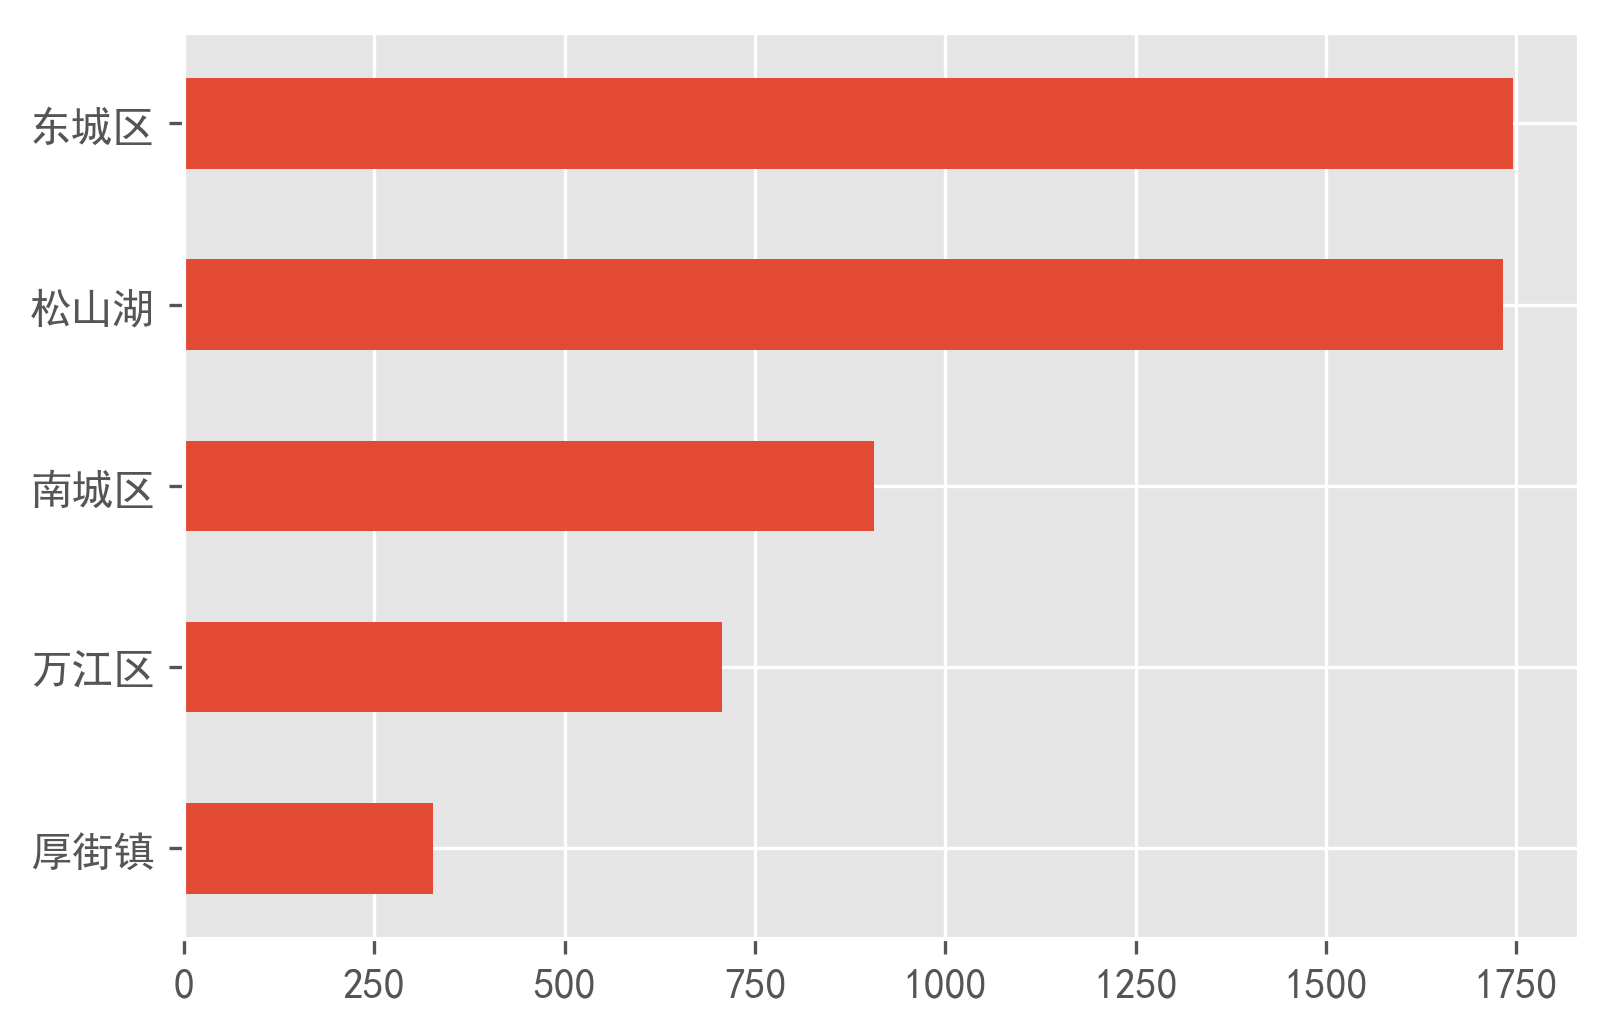

In [20]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='东莞']['dist'].value_counts(ascending=True).plot.barh()

C:\Users\HASEE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


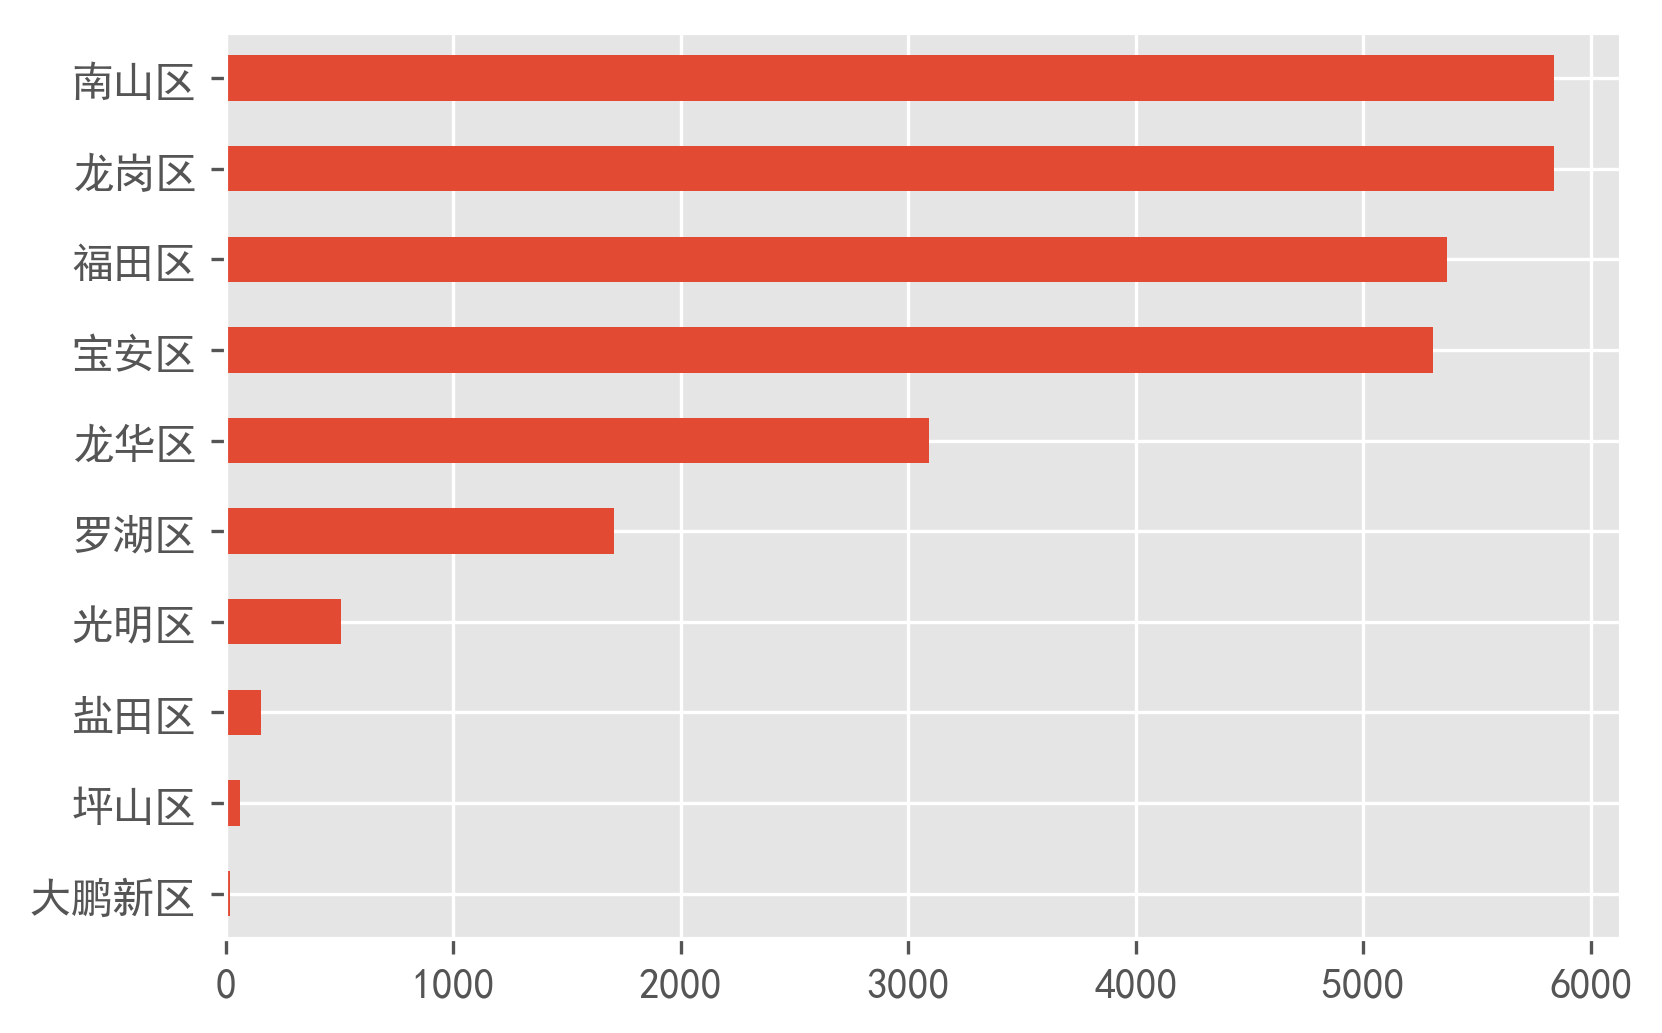

In [19]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='深圳']['dist'].value_counts(ascending=True).plot.barh()

C:\Users\HASEE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


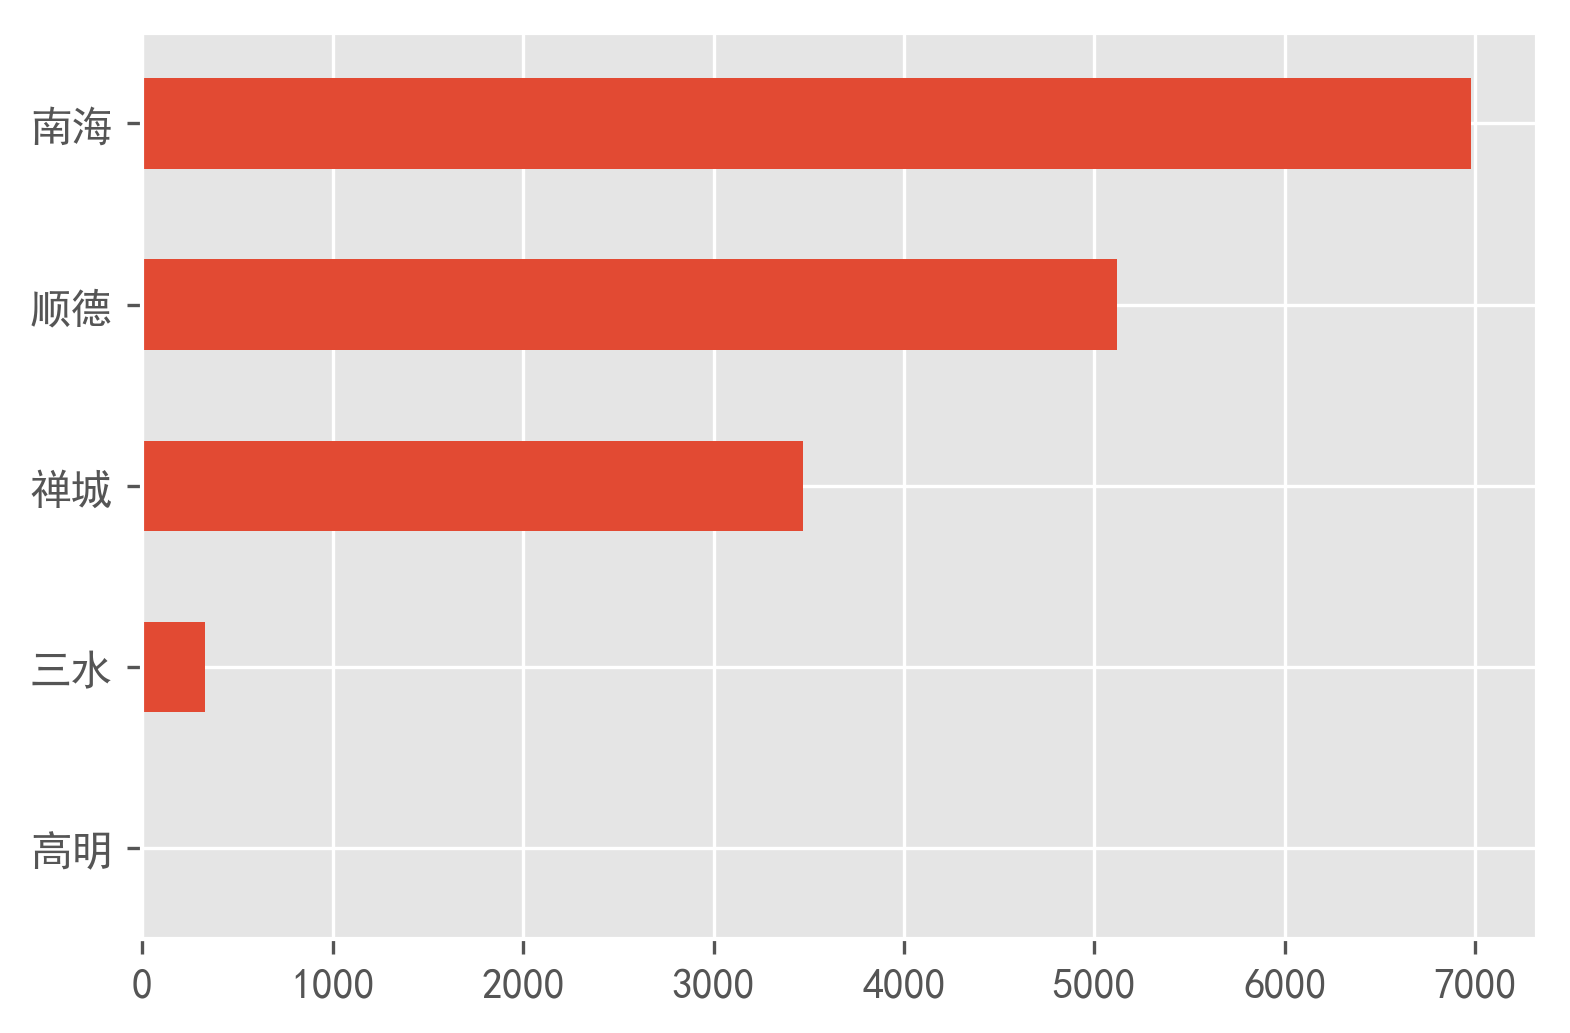

In [22]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='佛山']['dist'].value_counts(ascending=True).plot.barh()

E:\python\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


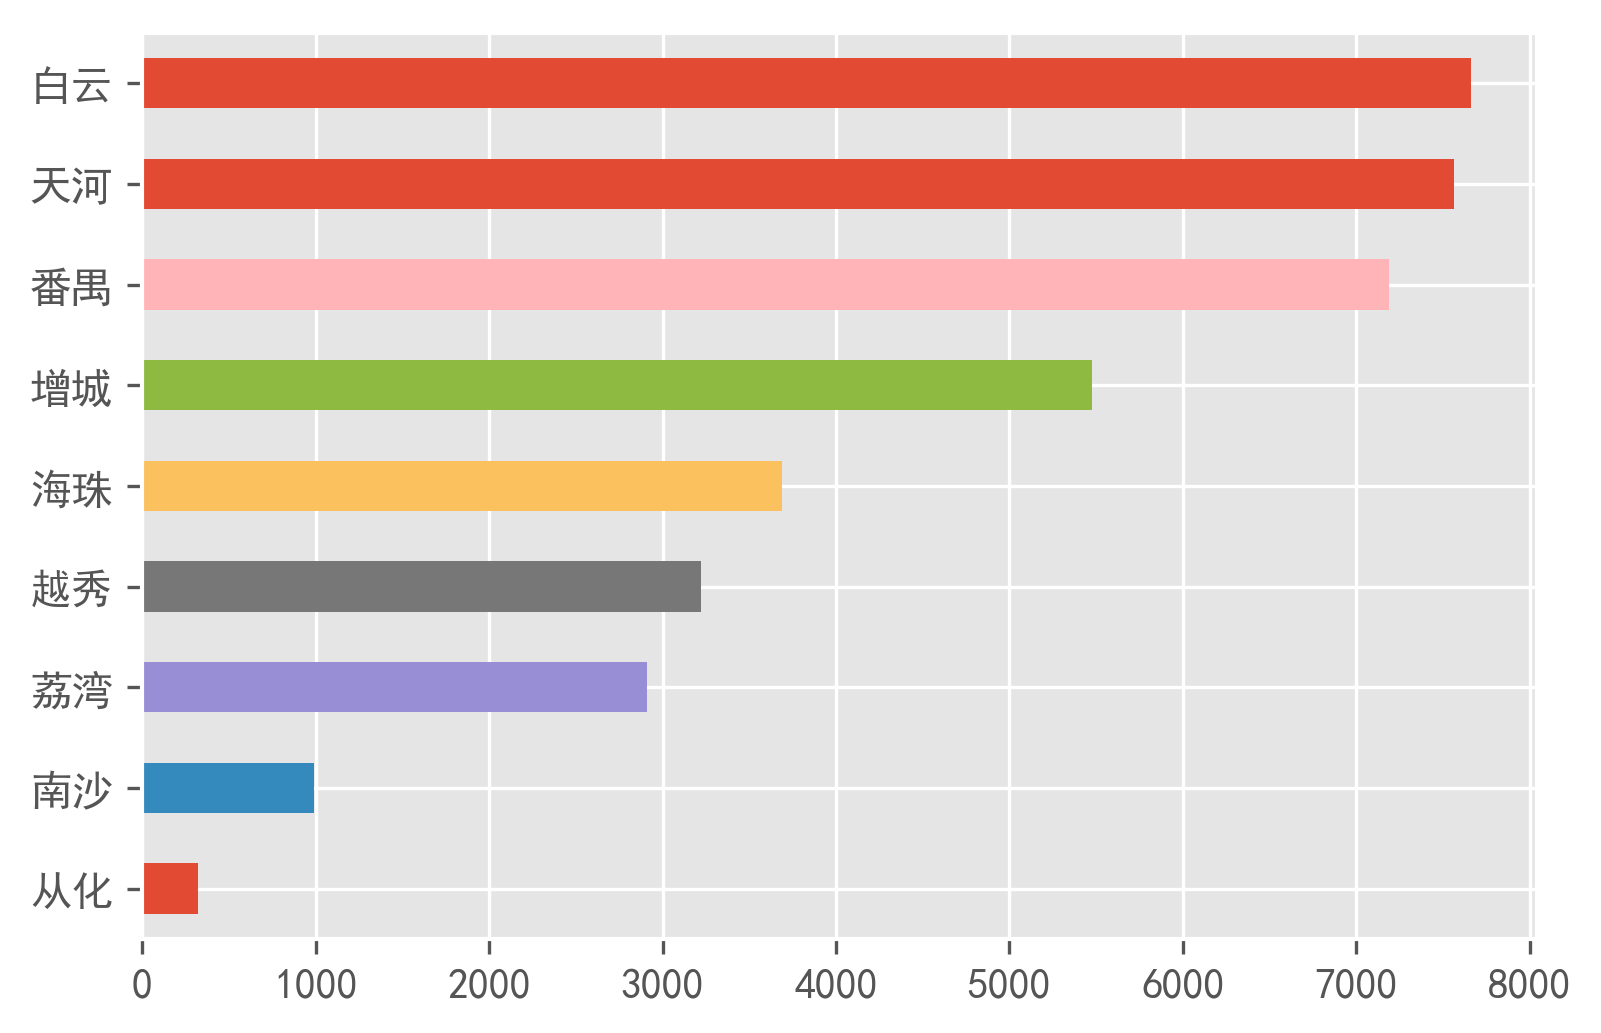

In [17]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='广州']['dist'].value_counts(ascending=True).plot.barh()


In [23]:
data['aver_price'] = np.round(data['rent_price_listing'] / data['rent_area'], 1)

In [24]:
bc_top10 = data.groupby(['city', 'bizcircle_name'])['aver_price'].mean().nlargest(50).reset_index()['city'].value_counts()

In [25]:
from scipy import stats

In [26]:
def distance_price_relation(city, data=data):
    g = sns.jointplot(x="distance", 
                  y="aver_price", 
                  data=data[(data['city']==city)&
                            (data['aver_price']<=350)].dropna(subset=['distance']), 
                  kind="reg",
                 stat_func=stats.pearsonr)
    g.fig.set_dpi(100)
    g.ax_joint.set_xlabel('最近地铁距离', fontweight='bold')
    g.ax_joint.set_ylabel('每平米租金', fontweight='bold')
    return g

C:\Users\HASEE\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


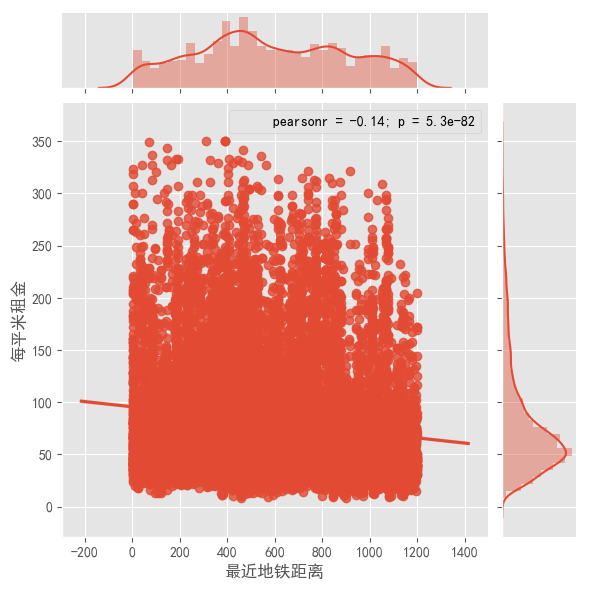

In [27]:
distance_price_relation('广州')

C:\Users\HASEE\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


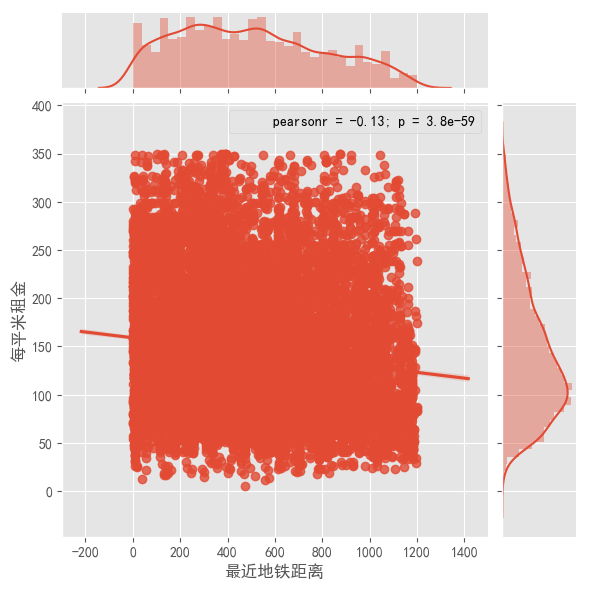

In [28]:
distance_price_relation('深圳')

C:\Users\HASEE\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


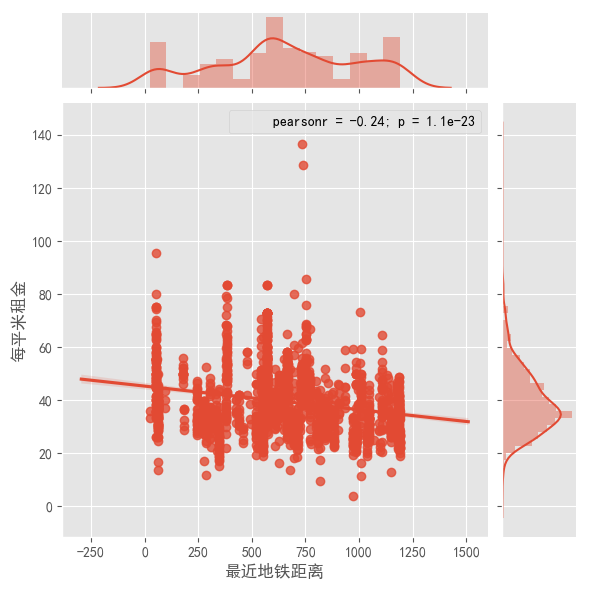

In [30]:
distance_price_relation('东莞')

In [29]:
bins = [100*i for i in range(13)]
data['bin'] = pd.cut(data.dropna(subset=['distance'])['distance'], bins)

C:\Users\HASEE\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


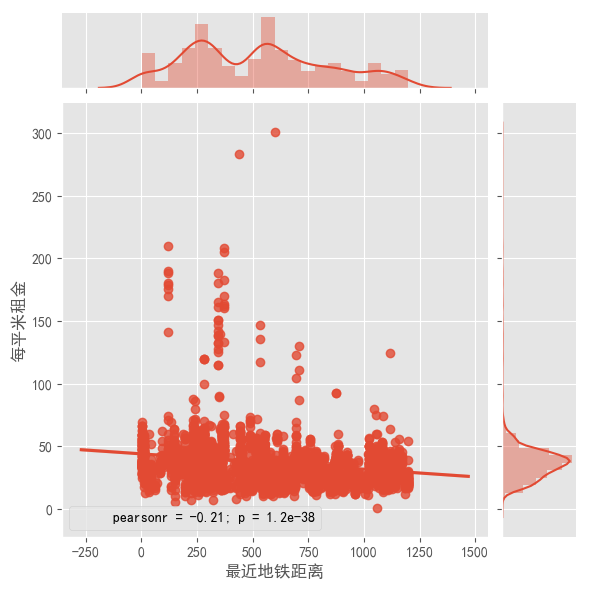

In [31]:
distance_price_relation('佛山')

In [33]:
bin_gz = data[data['city']=='广州'].groupby('bin')['aver_price'].mean()
bin_sz = data[data['city']=='深圳'].groupby('bin')['aver_price'].mean()

In [57]:
from pyecharts import Line
line = Line("距离地铁远近跟每平米租金均价的关系")
for city, bin_data in { '广州':bin_gz, '深圳':bin_sz}.items():
    line.add(city, bin_data.index, bin_data.values,
            legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
             xaxis_rotate=20, yaxis_min=8, legend_top=30)
line

ImportError: cannot import name 'Line' from 'pyecharts' (C:\Users\HASEE\Anaconda3\lib\site-packages\pyecharts\__init__.py)

In [34]:
!pip install pyecharts

  Stored in directory: C:\Users\HASEE\AppData\Local\pip\Cache\wheels\80\34\1c\3967380d9676d162cb59513bd9dc862d0584e045a162095606
Successfully built prettytable


In [36]:
# 根据house_title和house_tag再造一个字段：is_dep，也就是“是否是公寓”
data['is_dep'] = (data['house_title'].str.contains('公寓') + data['house_tag'].str.contains('公寓')) > 0

In [40]:
# 每个城市房源的公寓占比
for city in [ '广州','深圳','佛山','东莞']:
    print(city+'的公寓占总房源量比重为:{}%。'.format(
        np.round(data[data['city']==city]['is_dep'].mean()*100, 2)))

广州的公寓占总房源量比重为:24.63%。
深圳的公寓占总房源量比重为:59.37%。
佛山的公寓占总房源量比重为:8.11%。
东莞的公寓占总房源量比重为:5.65%。


In [41]:
is_dep = data[(data['city'].isin(['广州','深圳','东莞','佛山']))&
             (data['is_dep']==1)].groupby('city')['aver_price'].mean()
not_dep = data[(data['city'].isin(['广州','深圳','东莞','佛山']))&
             (data['is_dep']==0)].groupby('city')['aver_price'].mean()

In [46]:
bar = Bar("个人房源和公寓的每平米租金差别", width=600)
bar.add("个人房源", not_dep.index, np.round(not_dep.values, 0), 
        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar.add("公寓", is_dep.index, np.round(is_dep.values, 0),
       legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar

NameError: name 'Bar' is not defined

In [47]:
data['decorated'] = data[data['house_tag'].notna()]['house_tag'].str.contains('精装')

In [48]:
decorated = data[data['decorated']==1].groupby('city')['aver_price'].mean()

In [49]:
not_decorated = data[data['decorated']==0].groupby('city')['aver_price'].mean()

In [58]:
bar = Bar("各城市精装和简装的每平米租金差别", width=600)
bar.add("精装(刷过墙)", decorated.index, np.round(decorated.values, 0), 
        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar.add("简装(破房子)", not_decorated.index, np.round(not_decorated.values, 0),
       legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar

NameError: name 'Bar' is not defined

In [51]:
def layout_top5(city, data):
    layout_data = data[data['city']==city]['layout'].value_counts().nlargest(5)
    bar = Bar(city+"最受欢迎的户型", width=600)
    bar.add("", layout_data.index, layout_data.values, 
        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
    return bar

In [52]:
layout_top5('广州', data)

NameError: name 'Bar' is not defined

In [53]:
layout_top5('深圳', data)

NameError: name 'Bar' is not defined

In [54]:
from pyecharts import WordCloud
from collections import Counter
gz_tag = []
for st in data[data['city']=='广州'].dropna(subset=['house_tag'])['house_tag']:
    gz_tag.extend(st.split(' '))

name, value = WordCloud.cast(Counter(gz_tag))
wordcloud = WordCloud(width=500, height=500)
wordcloud.add("", name, value, word_size_range=[20, 80])
wordcloud

ImportError: cannot import name 'WordCloud' from 'pyecharts' (C:\Users\HASEE\Anaconda3\lib\site-packages\pyecharts\__init__.py)

In [55]:
for st in data[data['city']=='深圳'].dropna(subset=['house_tag'])['house_tag']:
    gz_tag.extend(st.split(' '))

name, value = WordCloud.cast(Counter(gz_tag))
wordcloud = WordCloud(width=500, height=500)
wordcloud.add("", name, value, word_size_range=[20, 80])
wordcloud

NameError: name 'gz_tag' is not defined